In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("student_scores2.csv")

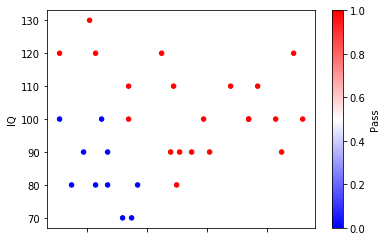

In [4]:
df.plot.scatter(x='Hours',y='IQ',c='Pass',colormap='bwr')

In [5]:
df.describe()

,Hours,IQ,Scores,Pass
count,31.000000,31.000000,31.000000,31.000000
mean,4.625806,97.419355,53.064516,0.677419
std,2.454108,15.484991,23.578147,0.475191
min,1.100000,70.000000,17.000000,0.000000
25%,2.600000,90.000000,30.000000,0.000000
50%,4.500000,100.000000,54.000000,1.000000
75%,6.450000,110.000000,70.000000,1.000000
max,9.200000,130.000000,95.000000,1.000000


In [8]:
x = df.drop(['Scores','Pass'],axis=1).values
y = df['Pass'].values.reshape(-1,1)     ### We were missing Reshape here!!
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape,y_train.shape

((24, 2), (24, 1))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
def sigmoid(s):
    return 1/(1+np.exp(-s))

def sigmoid_prime(s):
    return s * (1-s)


In [21]:
class NeuralNetwork(object):
    
    def __init__(self,input_size,output_size):
        
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_units = 3
        
        self.w1 = np.zeros((self.input_size,self.hidden_units))  
        self.w2 = np.zeros((self.hidden_units,self.output_size))
    
    def forward(self,x_train):
        
        self.output_1 = sigmoid(np.dot(x_train,self.w1))
        self.output_2 = sigmoid(np.dot(self.output_1,self.w2))
        return self.output_2
    
    def backward(self,X,y):
        
        delta_w2 = (self.output_2 - y_train) * sigmoid_prime(self.output_2) 
        delta_w1 = delta_w2.dot(self.w2.T) * sigmoid_prime(self.output_1)
        
        self.w2 = self.w2 + self.output_1.T.dot(delta_w2) * -1
        self.w1 = self.w1 + x_train.T.dot(delta_w1) * -1
    
    def fit(self,x_train,y_train):
        self.forward(x_train)
        self.backward(x_train,y_train)
    
    
    def predict(self,x_test):
        
        return y_prediction
    
    
    def loss(self,x,y_actual):
        prediction = self.forward(x)
        return np.mean(np.square(y_actual - prediction))
        



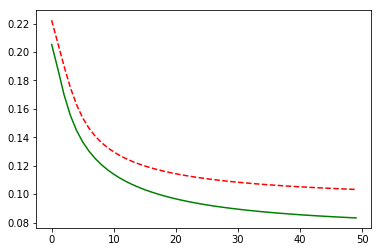

In [22]:
nn = NeuralNetwork(input_size=2,output_size=1)

train_loss = []
test_loss = []

for i in range(50):
    nn.fit(x_train,y_train)
    train_loss.append(nn.loss(x_train,y_train))
    test_loss.append((nn.loss(x_test,y_test)))

plt.plot(train_loss,'r--')
plt.plot(test_loss,'g')
plt.show()